In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') # Used to ignore warnings. (Should use this in every notebook)
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Understanding the data

In [3]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S


In [4]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Peuchen, Major. Arthur Godfrey",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.shape

(891, 12)

In [8]:
train.ndim

2

In [9]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
train.isnull().sum() # two coluns has null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# CHecking for null vlaue percentage
(train.isnull().sum()/ train.shape[0])*100 # Cabin has 77% null values and age has 19%

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
train.value_counts("Age") # Checking the unique count in each column

Age
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Length: 88, dtype: int64

# Explanatory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

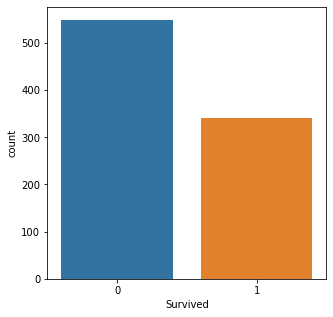

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(train["Survived"]) # It can be seen as the death ratio is high

<AxesSubplot:ylabel='Survived'>

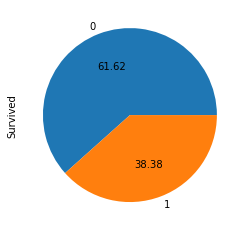

In [14]:
train["Survived"].value_counts().plot(kind="pie", autopct="%.2f") # ratio for survival

<AxesSubplot:xlabel='Pclass', ylabel='count'>

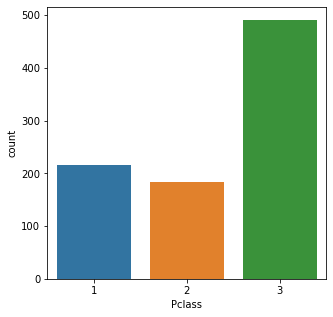

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(train["Pclass"]) # It can be seen people with low class were more than rich people

<AxesSubplot:ylabel='Pclass'>

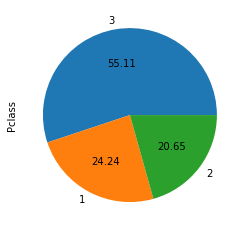

In [16]:
train["Pclass"].value_counts().plot(kind="pie", autopct="%.2f")

<AxesSubplot:xlabel='Sex', ylabel='count'>

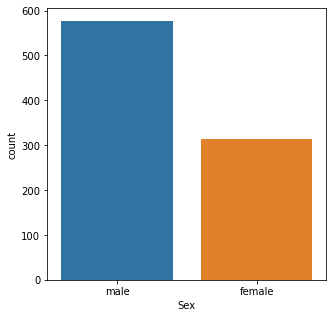

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(train["Sex"]) # Male count was more

<AxesSubplot:ylabel='Sex'>

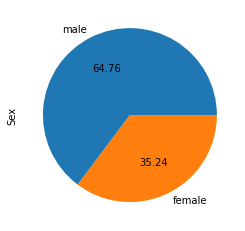

In [18]:
train["Sex"].value_counts().plot(kind="pie", autopct="%.2f")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

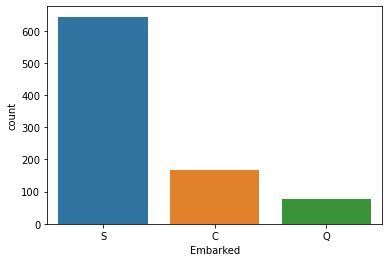

In [19]:
sns.countplot(train["Embarked"]) # the graph is showing most people got in from S 

<AxesSubplot:>

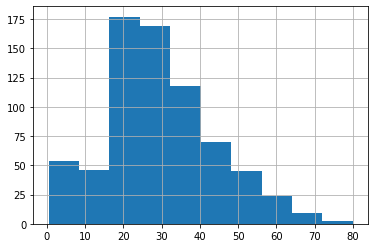

In [20]:
train["Age"].hist() # Distribution of Age. It can be seen people ranging between 18 to30 were the maximum

<AxesSubplot:xlabel='Age', ylabel='Density'>

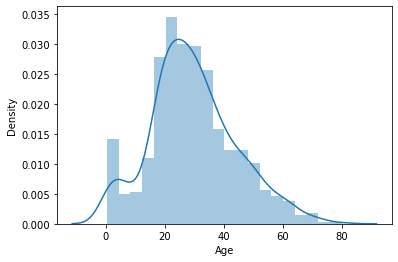

In [21]:
sns.distplot(train['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

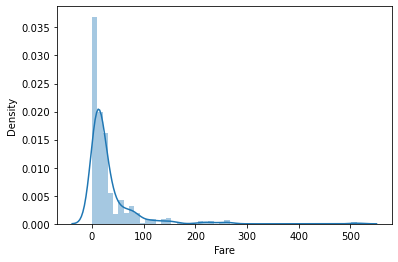

In [22]:
sns.distplot(train["Fare"])

# Multivariate analysis

Text(0.5, 1.0, 'Ratio of male and female passengers')

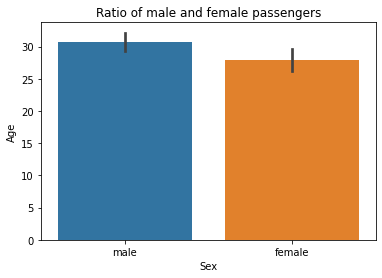

In [23]:
sns.barplot(train["Sex"], train["Age"]) # The maximum age for male to travel was between (30-33) and for female (27-30)
plt.title("Ratio of male and female passengers")

Text(0.5, 1.0, 'Graph for Fare V/S Sex of Passengers(who paid more)')

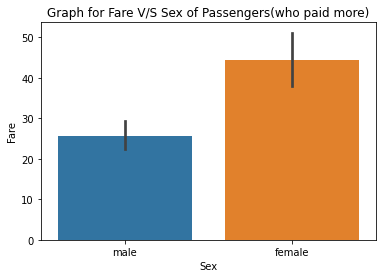

In [24]:
sns.barplot(train["Sex"], train["Fare"]) # Females paid higher to travel
plt.title("Graph for Fare V/S Sex of Passengers(who paid more)")

Text(0.5, 1.0, 'Which class paid more money')

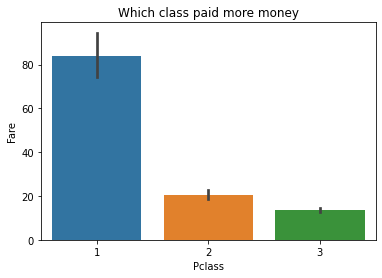

In [25]:
sns.barplot(train["Pclass"], train["Fare"]) # It can be said first calss ticket was too high (*3 times of 2nd class)
plt.title("Which class paid more money")

Text(0.5, 1.0, 'Maximum Aged Passenger entered from each gates')

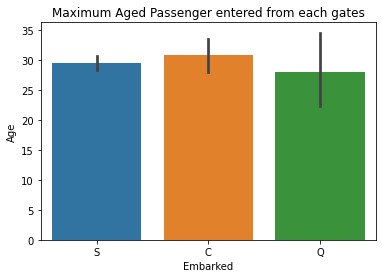

In [26]:
sns.barplot(train["Embarked"], train["Age"])
plt.title("Maximum Aged Passenger entered from each gates")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

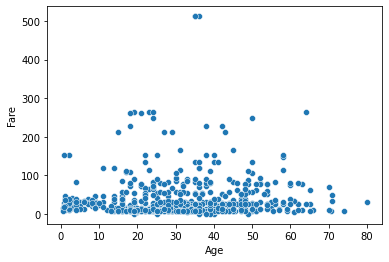

In [27]:
sns.scatterplot(train["Age"],train["Fare"])

Text(0.5, 1.0, 'graph showing how fare affeted the survival rate in each classe')

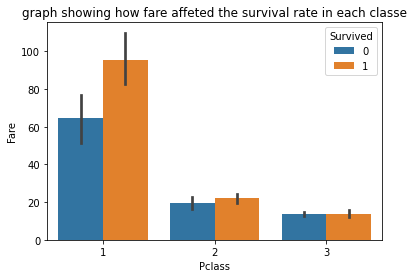

In [28]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")
plt.title("graph showing how fare affeted the survival rate in each classe") # Among survival of firstclass was more. Evn within the first class the ones who paid higher 
                                                                             # survived

Text(0.5, 1.0, 'graph showing how fare affeted the survival rate for each gender')

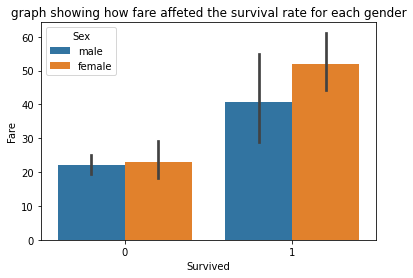

In [29]:
sns.barplot(data=train, x="Survived", y="Fare", hue="Sex")
plt.title("graph showing how fare affeted the survival rate for each gender") # THis clearly shows that rich people were targeted first among which females were prioritized.

Text(0.5, 1.0, 'graph showing the maximum aged people in each class')

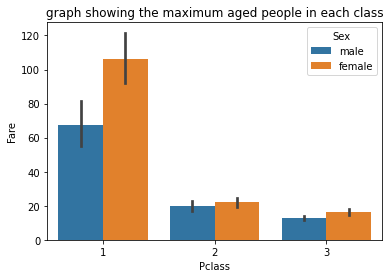

In [30]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Sex")
plt.title("graph showing the maximum aged people in each class")

 # Data Preprocessing

In [31]:
# Combining the train and test datas
train_len = len(train)
df = pd.concat([train,test], axis=0)# combine row wise not column wise
df = df.reset_index(drop="Ture")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1026,1027,NaN,3,"Carlsson, Mr. Carl Robert",male,24.0,0,0,350409,7.8542,NaN,S
565,566,0.0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
338,339,1.0,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
336,337,0.0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
506,507,1.0,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S


In [32]:
df.shape

(1309, 12)

## Drop null values

In [33]:
df.isna().sum() # chcking the totol number of null values in the dataset

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [34]:
# In the given null value description above I dont need the cabin others are important so imma only drop that
df = df.drop(["Cabin"], axis=1)

# Filling the age and fare columns with its respective mean values

In [35]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,S


In [36]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

# Filling the embarked column with its respective mode value
## (Because this is a categorical value)

In [37]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [38]:
df["Embarked"].isna().sum() # Its free from null values now

0

# Log Transformation for uniform data distribution

<AxesSubplot:xlabel='Fare', ylabel='Density'>

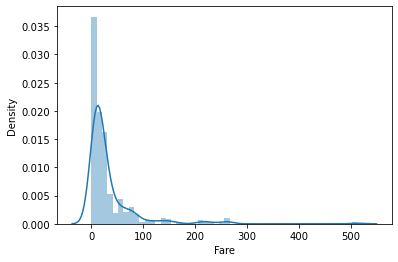

In [39]:
sns.distplot(df["Fare"])

In [40]:
df["Fare"] = np.log(df["Fare"]+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

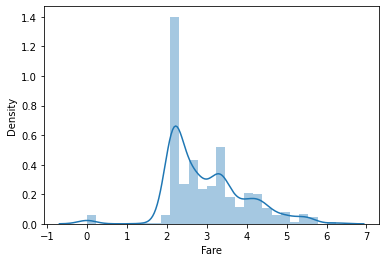

In [41]:
sns.distplot(df["Fare"])

# Corelation Matrix
With this we will be able to see which input attribute affets the columns

<AxesSubplot:>

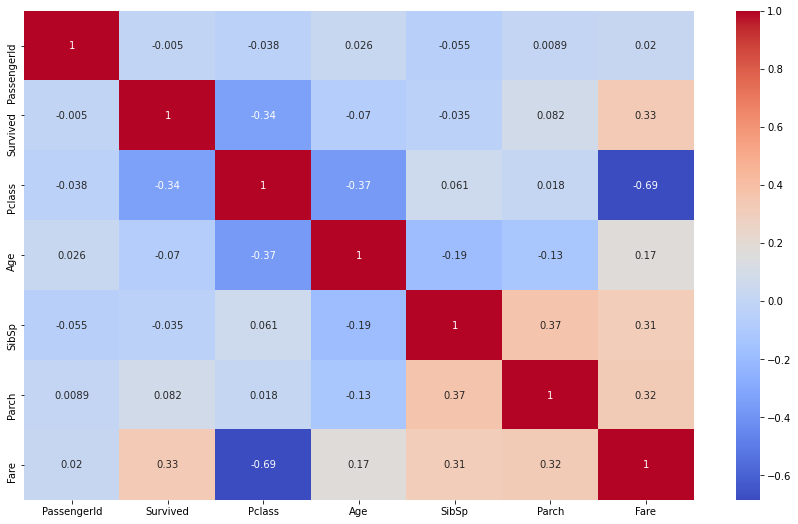

In [42]:
corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Droping unnecessary columns

In [43]:
df = df.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [44]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.000000,1,0,2.110213,S
1,1.0,1,female,38.000000,1,0,4.280593,C
2,1.0,3,female,26.000000,0,0,2.188856,S
3,1.0,1,female,35.000000,1,0,3.990834,S
4,0.0,3,male,35.000000,0,0,2.202765,S
...,...,...,...,...,...,...,...,...
1304,NaN,3,male,29.881138,0,0,2.202765,S
1305,NaN,1,female,39.000000,0,0,4.699571,C
1306,NaN,3,male,38.500000,0,0,2.110213,S
1307,NaN,3,male,29.881138,0,0,2.202765,S


# Label Encoding(Converting string into numbers for training)

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ["Sex", "Embarked"]
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,2.110213,2
1,1.0,1,0,38.0,1,0,4.280593,0
2,1.0,3,0,26.0,0,0,2.188856,2
3,1.0,1,0,35.0,1,0,3.990834,2
4,0.0,3,1,35.0,0,0,2.202765,2


In [46]:
df["Fare"] = df["Fare"].astype(int)
df["Age"] = df["Age"].astype(int)

In [47]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22,1,0,2,2
1,1.0,1,0,38,1,0,4,0
2,1.0,3,0,26,0,0,2,2
3,1.0,1,0,35,1,0,3,2
4,0.0,3,1,35,0,0,2,2
...,...,...,...,...,...,...,...,...
1304,NaN,3,1,29,0,0,2,2
1305,NaN,1,0,39,0,0,4,0
1306,NaN,3,1,38,0,0,2,2
1307,NaN,3,1,29,0,0,2,2


# Train Test Split for model training and validation

In [48]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [49]:

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22,1,0,2,2
1,1.0,1,0,38,1,0,4,0
2,1.0,3,0,26,0,0,2,2
3,1.0,1,0,35,1,0,3,2
4,0.0,3,1,35,0,0,2,2


In [50]:
test.head() # Since I am predicting the survival for the test data i dont need that column

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,NaN,3,1,34,0,0,2,1
892,NaN,3,0,47,1,0,2,2
893,NaN,2,1,62,0,0,2,1
894,NaN,3,1,27,0,0,2,2
895,NaN,3,0,22,1,1,2,2


In [52]:
X = train.drop(columns=['Survived'], axis=1)
y = train['Survived']

# Model Training

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test)*100) # Accuracy of the model. It compares precicted result with the original result and given the percentage for the given model
    
    score = cross_val_score(model, X, y, cv=5) # Splits the data in 5 parts. Train in 4 and test in 1
    print('CV Score:', np.mean(score)*100)

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model) # Logistic regression is giving the accuracy of 80 %

Accuracy: 80.26905829596413
CV Score: 78.90025735986441


In [62]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model) # Decision Tree n is giving the accuracy of 76 %

Accuracy: 77.13004484304933
CV Score: 79.91337643587973


In [63]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model) # Random Forest  in is giving the accuracy of 80 %

Accuracy: 80.71748878923766
CV Score: 80.47454648170233


In [64]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model) # Extra tree in is giving the accuracy of 80 %

Accuracy: 81.61434977578476
CV Score: 79.46582135459167


# Testing the survival with logistic regression

In [68]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [69]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,NaN,3,1,34,0,0,2,1
892,NaN,3,0,47,1,0,2,2
893,NaN,2,1,62,0,0,2,1
894,NaN,3,1,27,0,0,2,2
895,NaN,3,0,22,1,1,2,2


In [71]:

# input split for test data
X_test = test.drop(columns=['Survived'], axis=1)

In [72]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34,0,0,2,1
892,3,0,47,1,0,2,2
893,2,1,62,0,0,2,1
894,3,1,27,0,0,2,2
895,3,0,22,1,1,2,2


In [73]:
pred = model.predict(X_test) # These are the predictions made by the Logistic regression model which has the accuracy of 80%
pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.